# Feasibility Analysis for Luxury Multi-Sensory Dining Experiences Across Three Countries

In this analysis, we explore the viability of establishing luxury restaurants offering multi-sensory dining experiences in three distinct countries: Mexico, the Netherlands, and Turkey. This study forms part of a broader assessment, employing multiple filters to identify ideal locations for such innovative dining concepts. By evaluating local preferences through review ratios and overall star ratings, this notebook aims to provide insights into consumer satisfaction and potential market receptivity in each selected country.

In [1]:
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', None)

In [2]:
path = '/kaggle/input/multi-sensory-restaurant-smalldata/TRIP_AD_DATASET.xlsx'
df = pd.read_excel(path)

In [3]:
df.shape

(15, 10)

In [4]:
df.head()

,COUNTRY,RESTAURANT,FIVE,FOUR,THREE,TWO,ONE,TOTAL_REV,OVERALL,CP
0,NETHERLANDS,Flore,606,116,34,24,17,797,4.593476,821752
1,NETHERLANDS,Mediamantic Eten,22,4,2,2,3,33,4.212121,821752
2,NETHERLANDS,Belleza,123,7,4,3,0,137,4.824818,821752
3,NETHERLANDS,Nela,9,5,2,2,4,22,3.590909,821752
4,NETHERLANDS,REM,15,7,1,3,1,27,4.185185,821752


In [5]:
print(df.columns)

Index(['COUNTRY', 'RESTAURANT', 'FIVE', 'FOUR', 'THREE', 'TWO', 'ONE',
       'TOTAL_REV', 'OVERALL', 'CP'],
      dtype='object')


In [6]:
df.describe()

,FIVE,FOUR,THREE,TWO,ONE,TOTAL_REV,OVERALL,CP
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,1.500000e+01
mean,411.933333,127.000000,67.533333,33.533333,33.000000,673.000000,4.252149,8.378917e+06
std,474.541804,159.059288,91.325843,39.858440,38.646752,785.147484,0.387561,6.195596e+06
min,9.000000,4.000000,1.000000,2.000000,0.000000,22.000000,3.590909,8.217520e+05
25%,116.000000,7.500000,3.500000,3.000000,4.000000,146.500000,3.956978,8.217520e+05
50%,223.000000,61.000000,34.000000,22.000000,17.000000,261.000000,4.212121,8.855000e+06
75%,557.000000,182.000000,95.500000,51.000000,56.000000,904.500000,4.594357,1.546000e+07
max,1637.000000,519.000000,274.000000,135.000000,127.000000,2586.000000,4.824818,1.546000e+07


### Do people tend to go to fancy restaurants with multi-sensory experiences?

In [7]:
df.groupby('COUNTRY')['TOTAL_REV'].describe()

,count,mean,std,min,25%,50%,75%,max
COUNTRY,,,,,,,,
MEXICO,5.0,1102.6,925.571067,156.0,546.0,1012.0,1213.0,2586.0
NETHERLANDS,5.0,203.2,335.346388,22.0,27.0,33.0,137.0,797.0
TURKEY,5.0,713.2,824.532413,238.0,244.0,261.0,672.0,2151.0


In the dataset under analysis, there is a preliminary indication that Mexico exhibits a higher propensity for patronizing multi-sensory restaurant experiences. However, to derive a more accurate comparison, it is imperative to consider the populations of each country. Consequently, we will compute a ratio that delineates the relative frequency of visits to these types of restaurants per capita. This metric will enable us to ascertain which country demonstrates a higher per capita preference for multi-sensory dining experiences.

In [8]:
RATIOS = df.groupby('COUNTRY').agg({'TOTAL_REV':'sum', 'CP':'first'})

In [9]:
RATIOS['RATIOS'] = RATIOS['TOTAL_REV']/np.log(RATIOS['CP'])

In [10]:
RATIOS = RATIOS.reset_index()
RATIOS

,COUNTRY,TOTAL_REV,CP,RATIOS
0,MEXICO,5513,8855000,344.638044
1,NETHERLANDS,1016,821752,74.600597
2,TURKEY,3566,15460000,215.419251


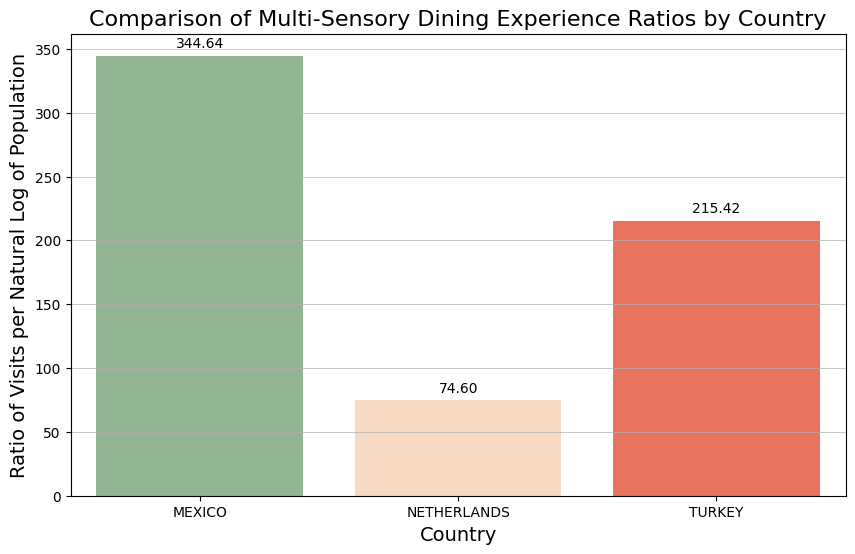

In [11]:
plt.figure(figsize=(10,6))
barplot = sns.barplot(x= 'COUNTRY', y= 'RATIOS', data= RATIOS,  palette=['#8FBC8F', '#FFDAB9', '#FF6347'])
plt.title('Comparison of Multi-Sensory Dining Experience Ratios by Country', fontsize=16)
plt.xlabel('Country', fontsize=14)
plt.ylabel('Ratio of Visits per Natural Log of Population', fontsize=14)
plt.grid(True, which='both', axis='y', linestyle='-', linewidth=0.5)
for p in barplot.patches:
    barplot.annotate(format(p.get_height(), '.2f'), 
                     (p.get_x() + p.get_width() / 2., p.get_height()), 
                     ha = 'center', va = 'center', 
                     xytext = (0, 9), 
                     textcoords = 'offset points')
plt.show()

The graph compares per capita visits to multi-sensory dining experiences in Mexico, the Netherlands, and Turkey, adjusted by the natural log of their populations. Mexico shows the highest engagement, suggesting a strong preference or greater availability of such experiences compared to the other countries. Turkey follows, with moderate engagement, while the Netherlands has the lowest ratio, possibly indicating fewer such dining opportunities or differing consumer preferences.

## Do people from these countries like these types of restaurants?

To enhance the clarity of this analysis, we classified restaurant patrons into two categories based on their ratings: those who appreciate the dining experience, represented by ratings of three to five stars, and those who do not favor the experience, indicated by one or two-star reviews

In [12]:
df['positive'] = df['FIVE'] + df['FOUR'] + df['THREE']
df['negative'] = df['TWO'] + df['ONE']
df['positive_ratio'] = df['positive']/(df['positive'] + df['negative'])

In [13]:
positive_ratio_by_country = df.groupby('COUNTRY').agg({
    'positive_ratio': 'mean',
    'OVERALL': 'mean'
}).reset_index()
positive_ratio_by_country

,COUNTRY,positive_ratio,OVERALL
0,MEXICO,0.892320,4.223345
1,NETHERLANDS,0.870854,4.281302
2,TURKEY,0.882539,4.251800


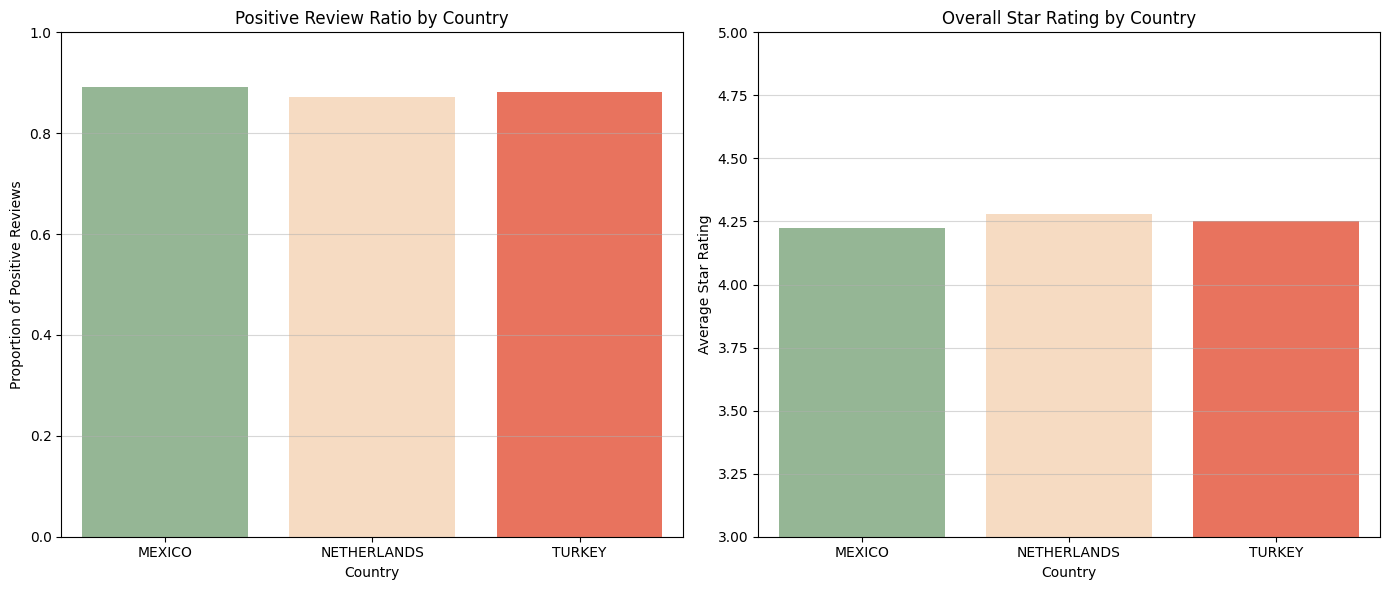

In [14]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.barplot(x='COUNTRY', y='positive_ratio', data=positive_ratio_by_country, palette=['#8FBC8F', '#FFDAB9', '#FF6347'])
plt.title('Positive Review Ratio by Country')
plt.xlabel('Country')
plt.ylabel('Proportion of Positive Reviews')
plt.ylim(0, 1) 
plt.grid(True, which='both', axis='y', linestyle='-', alpha=0.5)

plt.subplot(1, 2, 2)
sns.barplot(x='COUNTRY', y='OVERALL', data=positive_ratio_by_country, palette=['#8FBC8F', '#FFDAB9', '#FF6347'])
plt.title('Overall Star Rating by Country')
plt.xlabel('Country')
plt.ylabel('Average Star Rating')
plt.ylim(3, 5) 
plt.grid(True, which='both', axis='y', linestyle='-', alpha=0.5)

# Show the plot
plt.tight_layout()
plt.show()

## Conclusion

Based on the comprehensive analysis of the positive review ratios, overall star ratings, and the ratio of visits per natural log of the population, Mexico emerges as the optimal location for launching a luxury multi-sensory dining experience. While the Netherlands boasts the highest average star rating, Mexico leads in both the proportion of positive reviews and the visitation ratio. This suggests not only a strong existing appreciation for such unique dining experiences but also a greater relative frequency of visits per capita, adjusted for population size.

The combination of high engagement and favorable reviews in Mexico indicates a robust potential market for luxury dining. Investing in Mexico could leverage this enthusiasm, promising a receptive audience and a successful venture in the realm of multi-sensory gastronomy. This strategic positioning makes Mexico the most favorable choice among the evaluated countries for introducing a high-end restaurant that capitalizes on innovative and immersive dining experiences.